# **Customer Personality Analysis**
Analysis of company's ideal customers

**About this Dataset**

**Context**

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**Content**

**Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**

Need to perform clustering to summarize customer segments.

**Acknowledgement**

The dataset for this project is provided by Dr. Omar Romero-Hernandez.

Kaggle link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [ ]:
#memanggil dataset
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Clustering/marketing_campaign.csv",sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
#melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# **Data Cleaning**

In [ ]:
#cek data duplikat
data.duplicated().sum()

0

Dikarenakan tidak terdapat data duplikat maka dilakukan checking missing value terhadap dataset yang digunakan. Apabila terdapat missing value dengan jumlah yang sedikit maka akan dilakukan pembuangan row data yang memiliki missing value tersebut.

In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat missing value pada variabel income dengan jumlah 24 data missing. Dikarenakan data missing berjumlah sedikit maka akan dilakukan pembuangan data.

In [ ]:
#missing value dibuang

data1=data.dropna()
data1.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
data1.Z_CostContact.unique()

array([3])

In [ ]:
data1.Z_Revenue.unique()

array([11])

Selanjutnya akan dilakukan seleksi kolom. Kolom ID, Dt_Customer, Year_Birth, Z_CostContact, dan Z_Revenue pada kali ini tidak diperlukan untuk pengolahan data sehingga akan dibuang.

In [48]:
ID=data1.ID
data2=data1.drop(['ID','Dt_Customer','Year_Birth','Z_CostContact','Z_Revenue'],axis=1)
data2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,3,4,5,0,0,0,0,0,0,0
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,2,5,7,0,0,0,1,0,0,0
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,3,13,6,0,1,0,0,0,0,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,5,10,3,0,0,0,0,0,0,0


# **EDA**

Sebelum melakukan clustering, terlebih dahulu akan dilakukan standardisasi data dengan z-score.

In [ ]:
#standardisasi data numeric
import scipy.stats as stats

datanum=data2[['Income','Kidhome','Teenhome','Recency',
               'MntWines','MntFruits','MntMeatProducts',
               'MntFishProducts','MntSweetProducts','MntGoldProds',
               'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
               'NumWebVisitsMonth','NumStorePurchases']]
#membuat variabel z-score
z=stats.zscore(datanum)
z

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,NumStorePurchases
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,0.693232,-0.554143
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-0.131574,-1.169518
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,-0.543978,1.291982
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,0.280829,-0.554143
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,-0.131574,0.061232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.131574,-0.554143
2236,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,0.693232,-0.246455
2237,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,0.280829,2.215044
2238,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,-0.956381,1.291982


In [ ]:
#menggabungkan data

variabel0=data2.drop(['Income','Kidhome','Teenhome','Recency',
               'MntWines','MntFruits','MntMeatProducts',
               'MntFishProducts','MntSweetProducts','MntGoldProds',
               'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
               'NumWebVisitsMonth','NumStorePurchases'],axis=1)
variabel=pd.concat([z,variabel0],axis=1)
variabel

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,Education,Marital_Status,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,-0.554143,Graduation,Single,0,0,0,0,0,0,1
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,-1.169518,Graduation,Single,0,0,0,0,0,0,0
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,1.291982,Graduation,Together,0,0,0,0,0,0,0
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-0.554143,Graduation,Together,0,0,0,0,0,0,0
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,0.061232,PhD,Married,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,...,-0.554143,Graduation,Married,0,0,0,0,0,0,0
2236,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,...,-0.246455,PhD,Together,0,0,0,1,0,0,0
2237,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,...,2.215044,Graduation,Divorced,0,1,0,0,0,0,0
2238,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,...,1.291982,Master,Together,0,0,0,0,0,0,0


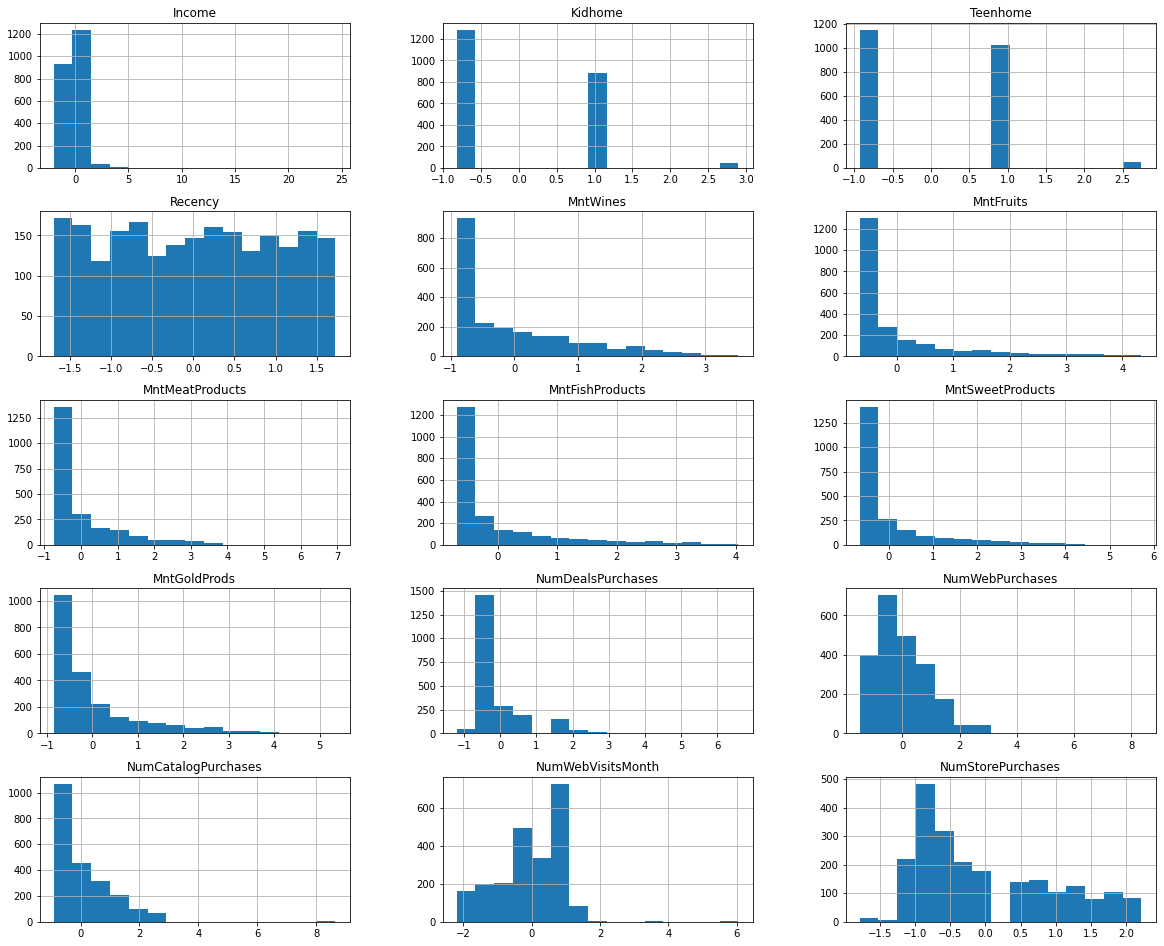

In [29]:
#histogram
import matplotlib.pyplot as plt
numerical_features=[feature for feature in z.columns if z[feature].dtypes!='object']

z[numerical_features].hist(bins=15, figsize=(20, 20), layout=(6, 3));

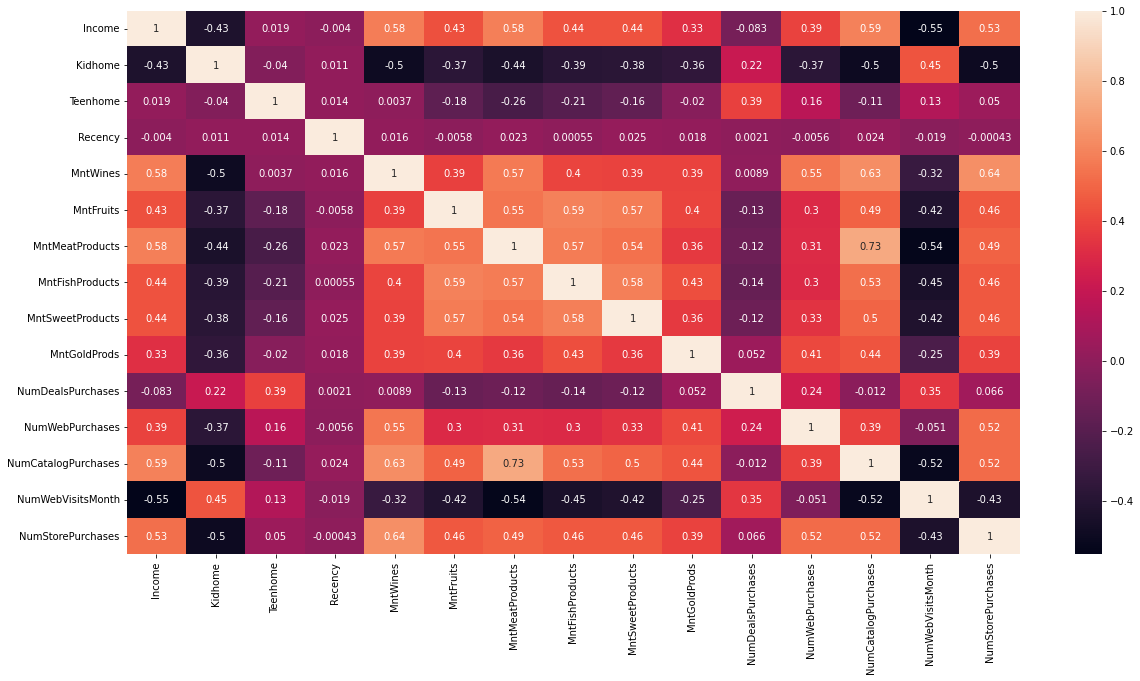

In [ ]:
#korelasi data numeric
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(z.corr(),annot=True)

# **K-Prototype Clustering**

Langkah selanjutnya adalah clustering. Dikarenakan variabel-variabel yang digunakan merupakan mix type (numeric dan category) sehingga metode clustering yang cocok digunakan adalah K-Prototype Clustering. Namun, terlebih dahulu akan ditentukan jumlah cluster optimal menggunakan metode Elbow.

In [ ]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


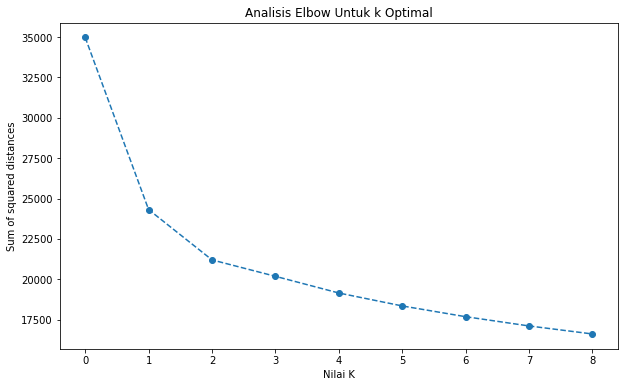

In [34]:
#Elbow
Sum_of_squared_distances=[]

range_values=range(1,10)
for i in range_values:
    kproto=KPrototypes(n_clusters=i)
    kproto.fit_predict(variabel,categorical=[15,16,17,18,19,20,21,22,23])
    Sum_of_squared_distances.append(kproto.cost_)

plt.figure(figsize=(10,6))    
plt.plot(Sum_of_squared_distances,linestyle='--',marker='o')
plt.xlabel('Nilai K')
plt.ylabel('Sum of squared distances')
plt.title('Analisis Elbow Untuk k Optimal')
plt.show()

Berdasarkan Gambar Analisis Elbow di atas, diperoleh jumlah cluster optimal sejumlah 3 cluster karena pada jumlah k = 3 (index 2 menunjukkan 3 jumlah cluster) terbentuk elbow dan grafiknya sudah mulai melandai.

In [45]:
#K-Prototype

kproto=KPrototypes(n_clusters=3)
cluster=kproto.fit_predict(variabel,categorical=[15,16,17,18,19,20,21,22,23])

In [46]:
print(kproto.cluster_centroids_)

[['-0.6897153494386518' '0.6576041122416129' '-0.10514691321043987'
  '0.006687906043223209' '-0.7788385262202929' '-0.5386851637730243'
  '-0.6417964130381495' '-0.5550277762600426' '-0.5371756090454906'
  '-0.5509870729621714' '-0.12897109566540443' '-0.7160977278836365'
  '-0.7235983959773434' '0.4756523370658067' '-0.7963015583795976'
  'Graduation' 'Married' '0' '0' '0' '0' '0' '0' '0']
 ['0.24059399836683076' '-0.40664530766093404' '0.775168888595441'
  '-0.022231846429761254' '0.5183093990843168' '-0.1223903407755536'
  '-0.12624029301606582' '-0.14968884916273703' '-0.114686456531943'
  '0.3300469655187424' '0.7218727680559799' '0.8406950557564838'
  '0.14524503678747516' '0.17772792843755042' '0.590515583993972'
  'Graduation' 'Married' '0' '0' '0' '0' '0' '0' '0']
 ['0.9795460810994194' '-0.7490350295654168' '-0.6210453322370652'
  '0.011259807082774322' '0.8488451131928068' '1.088748773758151'
  '1.2767268249570147' '1.146383001331461' '1.0780190395324403'
  '0.6387241436901

In [47]:
#cluster-nya
cluster_i=[]
for i in cluster:
  cluster_i.append(i)

cluster_i

[2,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,


Berikut merupakan hasil clustering dan profiling cluster:

In [50]:
#hasil clustering
hasil=ID.reset_index().assign(Cluster=cluster_i).drop('index',axis=1)
hasil

,ID,Cluster
0,5524,2
1,2174,0
2,4141,2
3,6182,0
4,5324,1
...,...,...
2211,10870,1
2212,4001,1
2213,7270,1
2214,8235,1


In [68]:
#profiling cluster berdasarkan data numeric
import statistics
data_hasil=datanum.reset_index().assign(Cluster=cluster_i).drop('index',axis=1)
data_hasil.groupby('Cluster').mean()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumWebVisitsMonth,NumStorePurchases
Cluster,,,,,,,,,,,,,,,
0,34888.911907,0.794773,0.448209,49.206196,42.426912,4.924492,23.084221,7.255566,4.970958,15.422072,2.075508,2.122943,0.553727,6.472410,3.212972
1,58302.375828,0.223510,0.927152,48.369205,479.892384,21.486755,138.688742,29.443709,22.319536,61.062914,3.711921,6.389073,3.096026,5.750000,7.720199
2,76899.875648,0.039724,0.167530,49.338515,591.366149,69.671848,453.279793,100.390328,71.295337,77.053541,1.317789,5.183074,6.005181,2.811744,8.416235


**Cluster 1**

In [69]:
#cluster 1
data_hasil_all=data2.reset_index().assign(Cluster=cluster_i).drop('index',axis=1)
cluster1=data_hasil_all[data_hasil_all['Cluster']==0]
cluster1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,0
7,PhD,Married,33454.0,1,0,32,76,10,56,3,...,4,8,0,0,0,0,0,0,0,0
8,PhD,Together,30351.0,1,0,19,14,0,24,3,...,2,9,0,0,0,0,0,0,1,0
9,PhD,Together,5648.0,1,1,68,28,0,6,1,...,0,20,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,Graduation,Married,24434.0,2,0,9,3,2,8,20,...,2,7,0,0,0,0,0,0,0,0
2206,Graduation,Single,11012.0,1,0,82,24,3,26,7,...,2,9,1,0,0,0,0,0,0,0
2208,Graduation,Single,26816.0,0,0,50,5,1,6,3,...,3,4,0,0,0,0,0,0,0,0
2210,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,2,7,0,0,0,0,0,0,0,0


In [72]:
#jumlah cluster 1 berdasarkan kategori Education
cluster1.Education.value_counts()

Graduation    505
PhD           193
Master        172
2n Cycle      111
Basic          52
Name: Education, dtype: int64

In [73]:
#jumlah cluster 1 berdasarkan kategori Marital Status
cluster1.Marital_Status.value_counts()

Married     398
Together    268
Single      236
Divorced    103
Widow        26
Alone         2
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

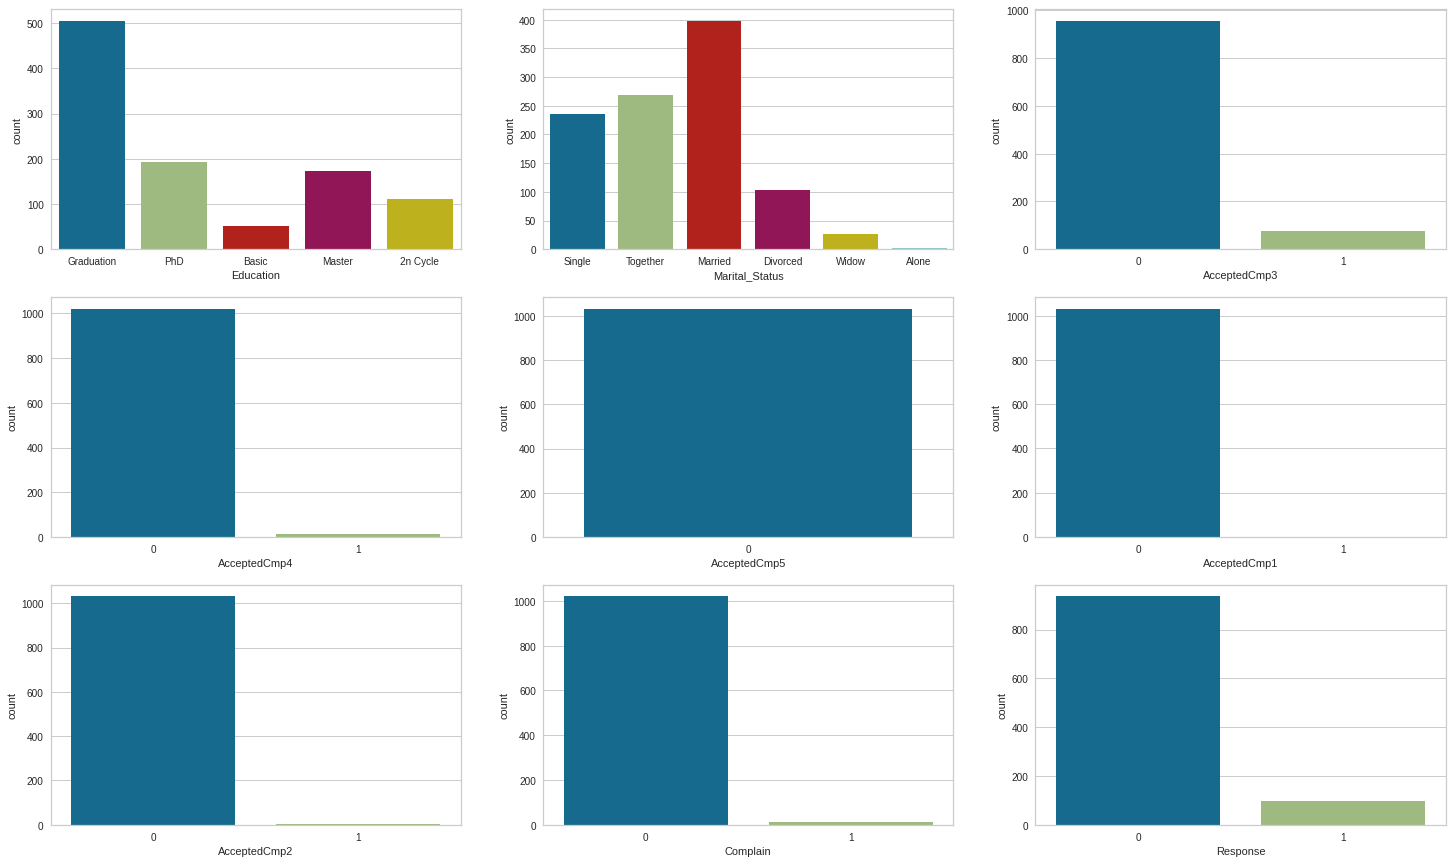

In [101]:
cluster0=variabel0.reset_index().assign(Cluster=cluster_i).drop(['index'],axis=1)
cluster1_kategori=cluster0[cluster0['Cluster']==0]

import seaborn as sns
plt.figure(figsize=(25,15))
for n in range(1,10):
  plt.subplot(3,3,n)
  sns.countplot(cluster1_kategori.iloc[:,n-1]);

**Cluster 2**

In [70]:
#Cluster 2
cluster2=data_hasil_all[data_hasil_all['Cluster']==1]
cluster2

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,1
5,Master,Together,62513.0,0,1,16,520,42,98,0,...,10,6,0,0,0,0,0,0,0,1
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,...,7,6,0,0,0,0,0,0,0,1
17,Master,Married,76995.0,0,1,91,1012,80,498,0,...,9,5,0,0,0,1,0,0,0,1
21,PhD,Married,58607.0,0,1,63,867,0,86,0,...,9,8,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Master,Single,44802.0,0,0,71,853,10,143,13,...,12,8,0,0,0,0,0,0,0,1
2211,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,4,5,0,0,0,0,0,0,0,1
2212,PhD,Together,64014.0,2,1,56,406,0,30,0,...,5,7,0,0,0,1,0,0,0,1
2213,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,13,6,0,1,0,0,0,0,0,1


In [74]:
#jumlah cluster 2 berdasarkan kategori Education
cluster2.Education.value_counts()

Graduation    287
PhD           170
Master        112
2n Cycle       34
Basic           1
Name: Education, dtype: int64

In [75]:
#jumlah cluster 1 berdasarkan kategori Marital Status
cluster2.Marital_Status.value_counts()

Married     253
Together    155
Single       93
Divorced     74
Widow        26
YOLO          2
Alone         1
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

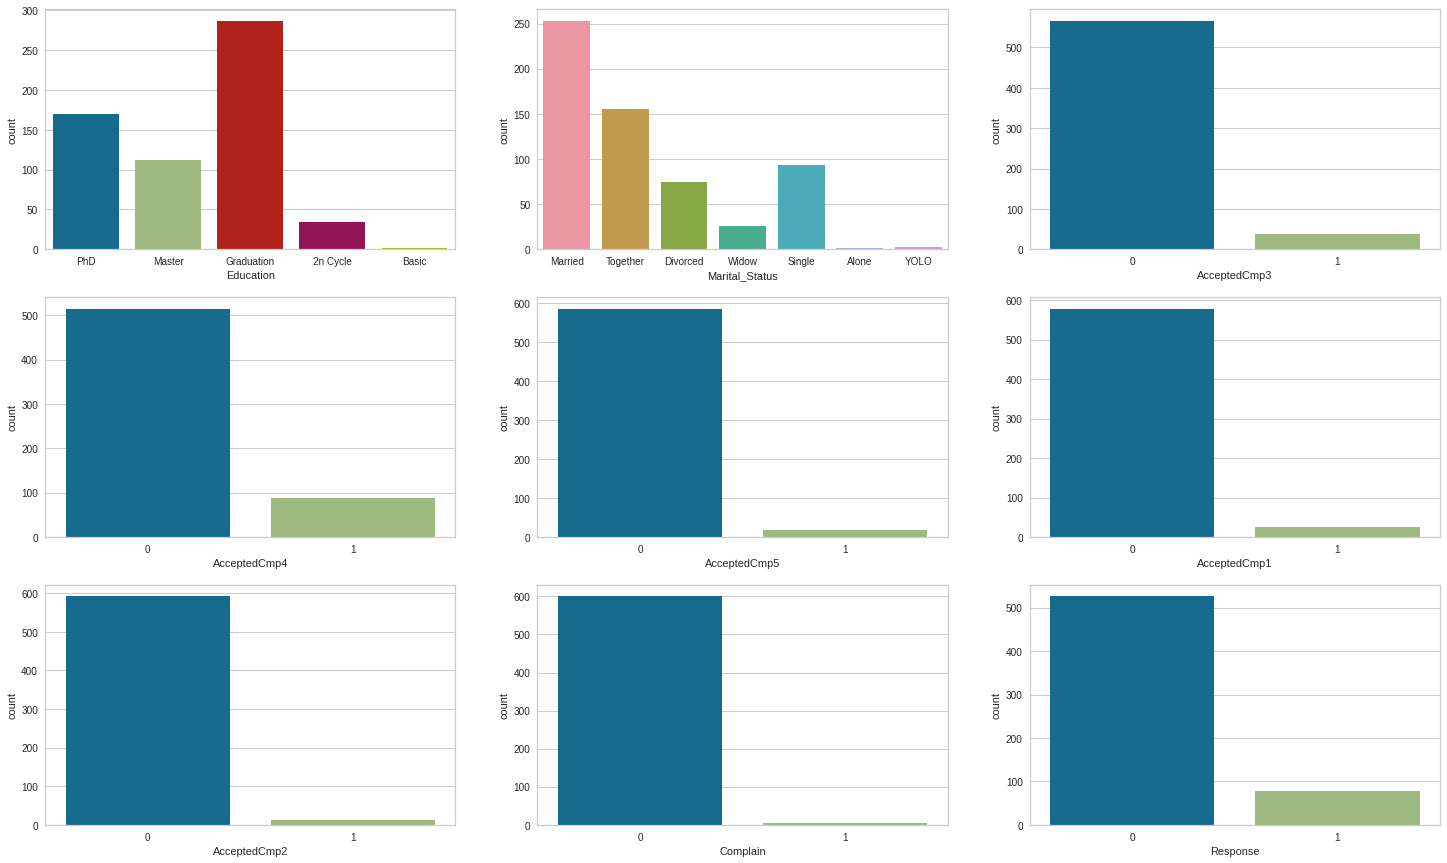

In [104]:
cluster2_kategori=cluster0[cluster0['Cluster']==1]

plt.figure(figsize=(25,15))
for n in range(1,10):
  plt.subplot(3,3,n)
  sns.countplot(cluster2_kategori.iloc[:,n-1]);

**Cluster 3**

In [71]:
#Cluster 3
cluster3=data_hasil_all[data_hasil_all['Cluster']==2]
cluster3

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,2
11,Graduation,Divorced,63033.0,0,0,82,194,61,480,225,...,8,2,0,0,0,0,0,0,0,2
14,PhD,Single,82800.0,0,0,23,1006,22,115,59,...,12,3,0,0,1,1,0,0,1,2
20,Graduation,Married,2447.0,1,0,42,1,1,1725,1,...,0,1,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,Graduation,Together,88325.0,0,0,42,519,71,860,93,...,9,2,0,0,0,0,0,0,0,2
2190,2n Cycle,Single,80617.0,0,0,42,594,51,631,72,...,8,2,0,0,0,0,0,0,0,2
2194,PhD,Widow,82032.0,0,0,54,332,194,377,149,...,7,1,0,0,0,0,0,0,0,2
2198,Master,Single,75777.0,0,0,12,712,26,538,69,...,11,1,0,1,1,0,0,0,1,2


In [76]:
#jumlah cluster 3 berdasarkan kategori Education
cluster3.Education.value_counts()

Graduation    324
PhD           118
Master         81
2n Cycle       55
Basic           1
Name: Education, dtype: int64

In [77]:
#jumlah cluster 3 berdasarkan kategori Marital Status
cluster3.Marital_Status.value_counts()

Married     206
Together    150
Single      142
Divorced     55
Widow        24
Absurd        2
Name: Marital_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

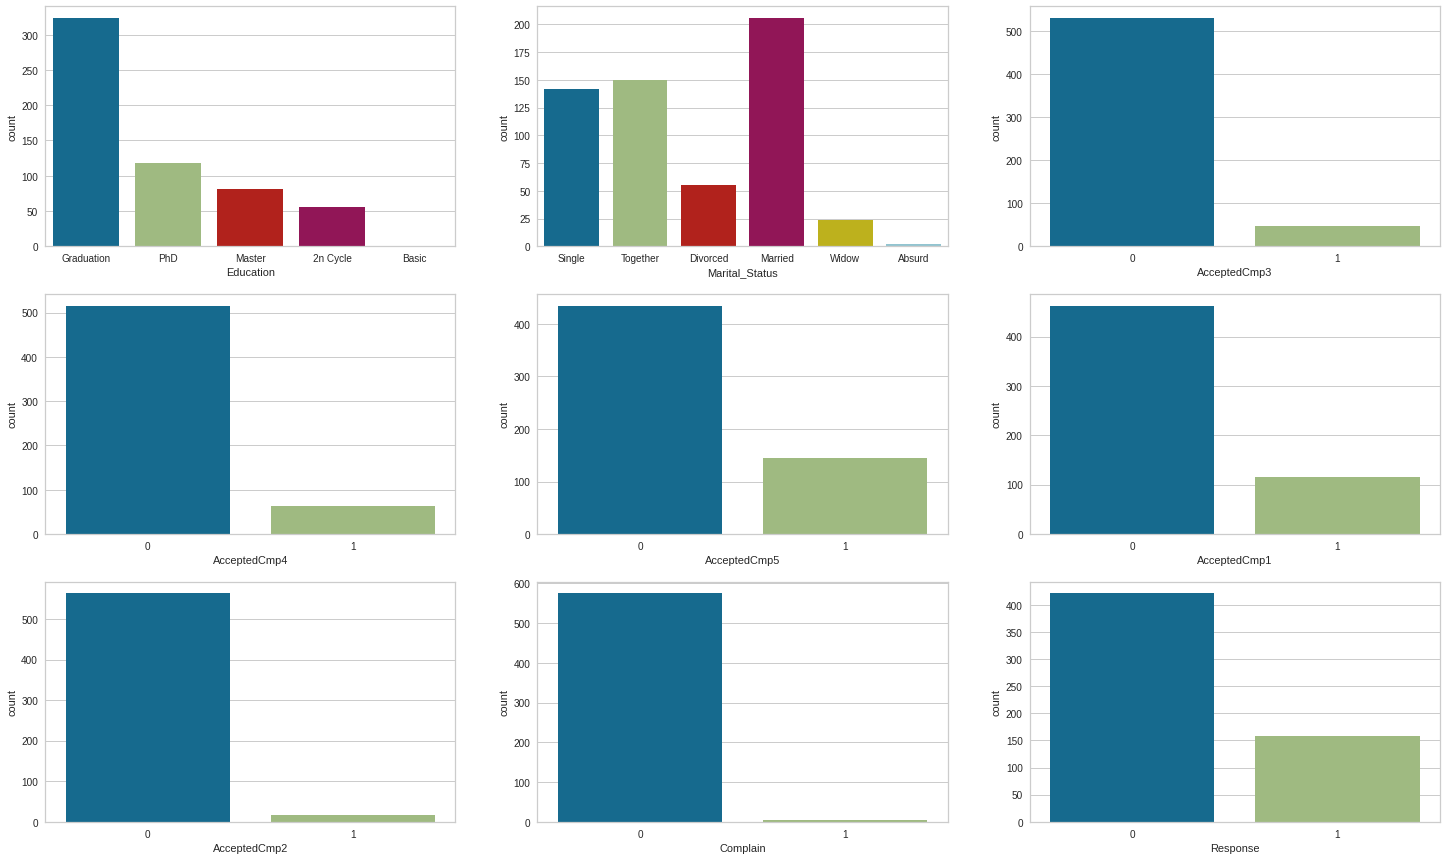

In [105]:
cluster3_kategori=cluster0[cluster0['Cluster']==2]

plt.figure(figsize=(25,15))
for n in range(1,10):
  plt.subplot(3,3,n)
  sns.countplot(cluster3_kategori.iloc[:,n-1]);